In [41]:
training_logs = []
with open("./log/PointNetPP/logs/PointNetPP.txt", "r") as f:
    lines = f.readlines()
training_logs = [ line.split("\n")[0][39:] for line in lines]

scores_by_epochs = {"test_accuracy":[],
                    "class_avg_iou":[],
                    "instance_avg_iou":[]}

for line in training_logs:
    if "- Epoch" in line and "test" in line:
        line = line.split("test Accuracy: ")[1]
        scores_by_epochs["test_accuracy"].append(eval(line[0:8]))
        line = line.split("Class avg mIOU: ")[1]
        scores_by_epochs["class_avg_iou"].append(eval(line[0:8]))
        line = line.split("Instance avg mIOU: ")[1]
        scores_by_epochs["instance_avg_iou"].append(eval(line[0:8]))


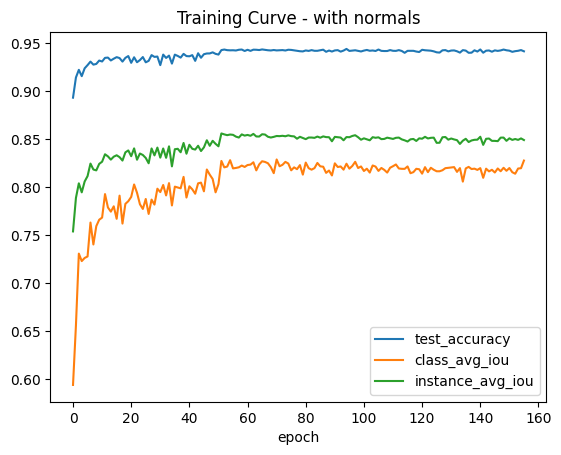

In [59]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(156), scores_by_epochs["test_accuracy"],label="test_accuracy")
plt.plot(np.arange(156), scores_by_epochs["class_avg_iou"],label="class_avg_iou")
plt.plot(np.arange(156), scores_by_epochs["instance_avg_iou"],label="instance_avg_iou")
plt.title("Training Curve - with normals")
plt.xlabel("epoch")
plt.legend()

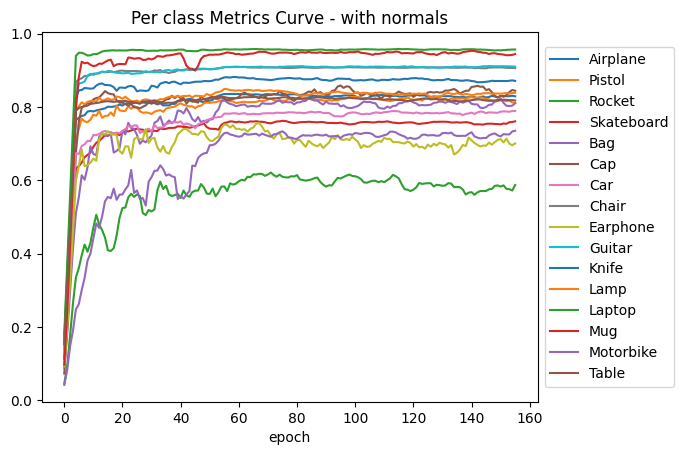

In [78]:
scores_by_epochs = {"Airplane":[],
                    "Pistol":[],
                    "Rocket":[],
                    "Skateboard":[],
                    "Bag":[],
                    "Cap":[],
                    "Car":[],
                    "Chair":[],
                    "Earphone":[],
                    "Guitar":[],
                    "Knife":[],
                    "Lamp":[],
                    "Laptop":[],
                    "Mug":[],
                    "Motorbike":[],
                    "Table":[]}

for line in training_logs:
    for obj in scores_by_epochs.keys():
        if obj in line:
            line = line.split(obj)[1]
            # print(obj,line[-8:])
            scores_by_epochs[obj].append(eval(line[-8:]))

window_size = 5
for obj in scores_by_epochs.keys():
    plt.plot(np.arange(156), np.convolve(np.array(scores_by_epochs[obj]),np.ones(window_size)/window_size)[0:-window_size+1],label=obj)

plt.title("Per class Metrics Curve - with normals")
plt.xlabel("epoch")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
